In [1]:
import numpy as np
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from IPython.display import Image as display_image

In [2]:
class okiya():
    
    def __init__(self):
        self.observation = np.array([
            [i for i in range(0,16)],
            np.zeros(16),
            np.zeros(16)
        ])
        self.relations = np.array([
        [ 1,  2,  3,  4,  8, 12], 
        [ 0,  2,  3,  5,  9, 13], 
        [ 0,  1,  3,  6, 10, 14], 
        [ 0,  1,  2,  7, 11, 15], 
        [ 0,  5,  6,  7,  8, 12], 
        [ 1,  4,  6,  7,  9, 13], 
        [ 2,  4,  5,  7, 10, 14], 
        [ 3,  4,  5,  6, 11, 15], 
        [ 0,  4,  9, 10, 11, 12], 
        [ 1,  5,  8, 10, 11, 13], 
        [ 2,  6,  8,  9, 11, 14], 
        [ 3,  7,  8,  9, 10, 15], 
        [ 0,  4,  8, 13, 14, 15], 
        [ 1,  5,  9, 12, 14, 15], 
        [ 2,  6, 10, 12, 13, 15], 
        [ 3,  7, 11, 12, 13, 14]
        ])
        
    def action_sample(self):
        return np.random.randint(8, size=(1))
        
    def step(self, action):
        reward = 0
        done = 0
        return reward, done
    
    def reset(self):
        np.random.shuffle(self.observation[0])
    
    def render(self, draw_numbers = True, hi_res = True):
        tiles_reshaped = self.observation[0].reshape([4,4])
        p1_reshaped = self.observation[1].reshape([4,4])
        p2_reshaped = self.observation[2].reshape([4,4])
        for row in range(4):
            for col in range(4):
                if p1_reshaped[row][col]:
                    tiles_reshaped[row][col] = 16
                elif p2_reshaped[row][col]:
                    tiles_reshaped[row][col] = 17
        i = 0
        tile_row = None
        for row in range(4):
            for col in range(4):
                tile_id = str(int(tiles_reshaped[row][col]))

                if hi_res:
                    filename = 'higardentile'+tile_id+'.png'
                    im = Image.open('images/'+filename)
                    im = im.resize((464,464), Image.ANTIALIAS)
                    number_size = 320
                else:
                    filename = 'lowgardentile'+tile_id+'.png'
                    im = Image.open('images/'+filename)
                    im = im.resize((115,115), Image.ANTIALIAS)
                    number_size = 80

                if draw_numbers:
                    if tile_id == '16':
                        tile_id = 'P1'
                    elif tile_id == '17':
                        tile_id = 'P2'
                    im = self.draw_text(tile_id, number_size, (50, 255, 50), im)

                if col == 0:
                    tile = np.array(im)
                else:
                    tile_r = np.array(im)
                    tile = np.concatenate((tile, tile_r), axis=1)
                i += 1
            if row == 0:
                tile_row = tile
            else:
                tile_row = np.concatenate((tile_row, tile), axis=0)

        im = Image.fromarray(tile_row)
        img_path = 'images/tiles.png'
        im.save(img_path)        
        return img_path
    
    def draw_text(self, text, font_size, color, img):
        font = ImageFont.truetype("/usr/share/fonts/truetype/freefont/FreeMono.ttf", font_size, encoding="unic")
        draw = ImageDraw.Draw(img)
        w, h = draw.textsize(text, font)
        draw.text(((img.width - w) / 2, (img.height - h) / 2), text, color, font)
        return img

In [3]:
env = okiya()
for episode in range(100):
    env.reset()
    for i in range(10000):
        # we choose action by sampling random action from environment's action space. Every environment has
        # some action space which contains the all possible valid actions and observations,
        action = env.action_sample()
        
        # Then for each step, we will record the observation, reward, done, info
        reward, done = env.step(action)

        # When done is true, we print the time steps taken for the episode and break the current episode.
        if done:
            print("{} timesteps taken for the Episode".format(i+1))
            break

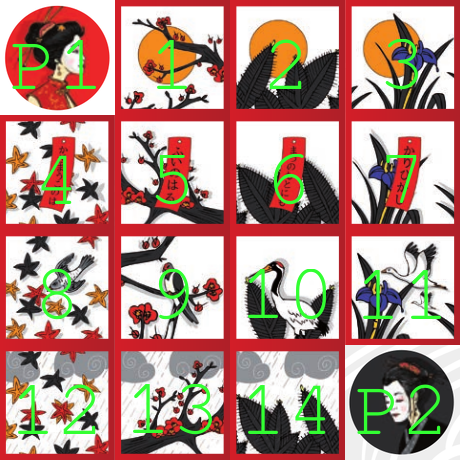

In [4]:
env = okiya()
env.observation[1][0]=1
env.observation[2][15]=1
img_path = env.render(hi_res = False)
display_image(img_path)

In [5]:
env.observation

array([[16.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 17.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.]])